# Analyse du cas R-S et graphiques 2D

L'objectif de cet exemple est de présenter le cas R-S. Nous présentons également des éléments graphiques pour la visualisation de la surface d'état limite en 2 dimensions.

In [1]:
import openturns as ot
import numpy as np

In [2]:
R = ot.Normal(4., 1.)
R.setDescription("R")

S = ot.Normal(2., 1.)
S.setDescription("S")

In [3]:
g = ot.SymbolicFunction(["R","S"],["R-S"])

In [4]:
inputvector = ot.ComposedDistribution([R,S])
inputRV = ot.RandomVector(inputvector)
outputRV = ot.CompositeRandomVector(g, inputRV)
eventF = ot.Event(outputRV, ot.GreaterOrEqual(), 0) 

## Dessiner les isovaleurs de la fonction d'état limite

In [5]:
alphaMin = 0.01
alphaMax = 1 - alphaMin
lowerBound = ot.Point([R.computeQuantile(alphaMin)[0], S.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([R.computeQuantile(alphaMax)[0], S.computeQuantile(alphaMax)[0]])

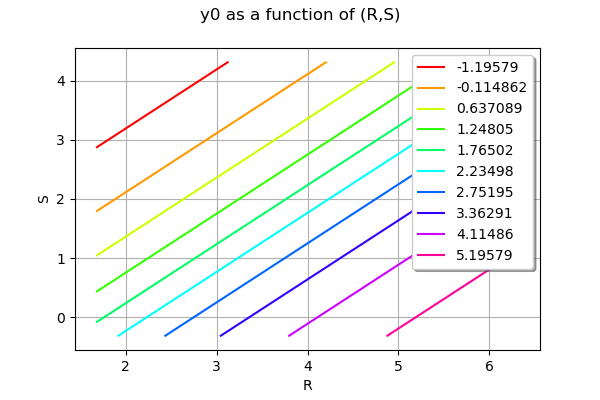

In [6]:
nbPoints = [100, 100]
g.draw(lowerBound, upperBound, nbPoints)

## Visualiser les zones fiables et défaillantes

In [7]:
sampleSize = 500

In [8]:
sampleInput = inputvector.getSample(sampleSize)
sampleInput[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[R,S] data=[[4.6082,2.18972],[2.73383,0.440103],[3.56173,2.14171],[5.20548,1.68712],[1.81861,0.903308]]

In [9]:
Y = g(sampleInput)

In [10]:
Yarray = np.array(Y)

In [11]:
indices = Yarray > 0.0
indices = indices.ravel()

In [12]:
Xarray = np.array(sampleInput)

In [13]:
XPositif = Xarray[indices, :]

In [14]:
autresIndices = [not indices[i] for i in range(len(indices))]

In [15]:
XNegatifs = Xarray[autresIndices, :]

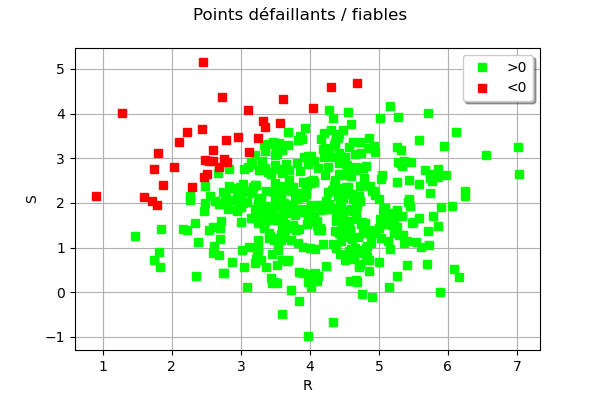

In [16]:
myGraph = ot.Graph('Points défaillants / fiables', 'R', 'S', True, '')
myCloud = ot.Cloud(ot.Sample(XPositif), 'green', 'fsquare', '>0')
myGraph.add(myCloud)
myCloud = ot.Cloud(ot.Sample(XNegatifs), 'red', 'fsquare', '<0')
myGraph.add(myCloud)
myGraph.setLegendPosition("topright")
myGraph

## Dessiner la surface d'état limite

In [17]:
bounds = ot.Interval(lowerBound, upperBound)
bounds

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[1.67365,-0.326348] upper bound=class=Point name=Unnamed dimension=2 values=[6.32635,4.32635] finite lower bound=[1,1] finite upper bound=[1,1]

In [18]:
nX = 30
nY = 30
boxExperiment = ot.Box([nX, nY], bounds)
inputSample = boxExperiment.generate()

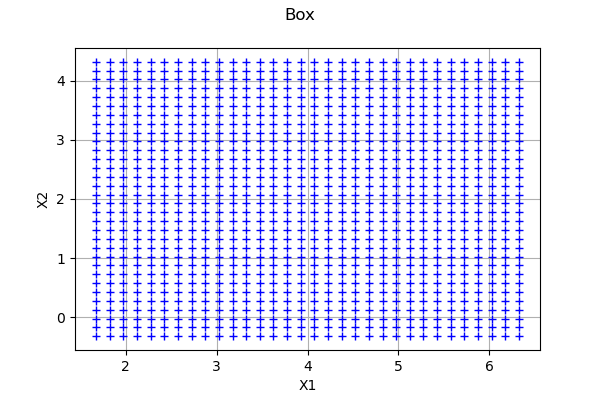

In [19]:
graph = ot.Graph("Box", "X1", "X2", True)
cloud = ot.Cloud(inputSample[:,0], inputSample[:,1])
graph.add(cloud)
graph

In [20]:
outputSample = g(inputSample)

In [21]:
def linearSample(xmin, xmax, npoints):
    '''Returns a sample created from a regular grid
    from xmin to xmax with npoints points.'''
    step = (xmax-xmin)/(npoints-1)
    rg = ot.RegularGrid(xmin, step, npoints)
    vertices = rg.getVertices()
    return vertices

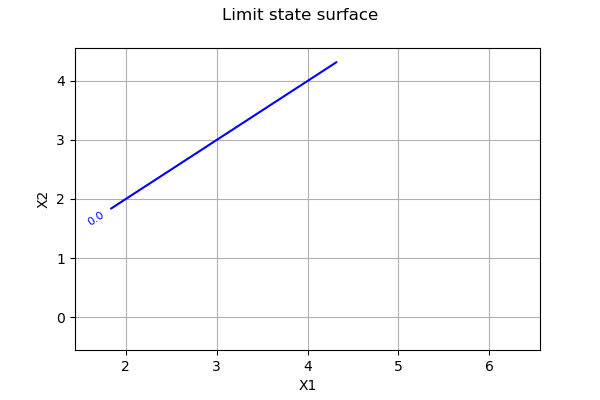

In [22]:
# Create an empty graph
myGraph = ot.Graph('Limit state surface', 'X1', 'X2', True, '')
# Create the contour
levels = ot.Point([0.0])
labels = ["0.0"]
drawLabels = True
x = linearSample(lowerBound[0], upperBound[0], nX + 2)
y = linearSample(lowerBound[1], upperBound[1], nY + 2)
myContour = ot.Contour(x, y, outputSample, levels, labels, drawLabels)
myGraph.add(myContour)
myGraph

## Color cross cut

In [23]:
# Define the number of interval in each direction of the box
myIndices = [5, 10]
myMesher = ot.IntervalMesher(myIndices)

In [24]:
myInterval = ot.Interval(lowerBound, upperBound)
myMeshBox = myMesher.build(myInterval)

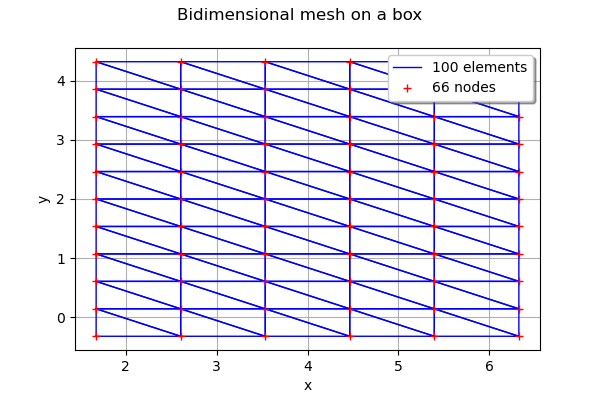

In [25]:
mygraph3 = myMeshBox.draw()
mygraph3.setTitle('Bidimensional mesh on a box')
mygraph3

In [26]:
numberSimplices = myMeshBox.getSimplicesNumber()
numberSimplices

100

In [27]:
simplices = myMeshBox.getSimplices()

In [28]:
simplices[0]

[0,1,6]

In [29]:
vertices = myMeshBox.getVertices()
vertices[0]

class=Point name=Unnamed dimension=2 values=[1.67365,-0.326348]

In [30]:
palette = ot.Drawable.BuildDefaultPalette(2)
myPaletteColor = palette[1]

In [31]:
polyData = []
for i in range(numberSimplices):
    simplex = simplices[i]
    corners = [vertices[simplex[0]], vertices[simplex[1]], 
               vertices[simplex[2]], vertices[simplex[2]]]
    polyData.append(corners)

In [32]:
numberOfPolygons = numberSimplices

In [33]:
polygonList = [ot.Polygon(polyData[i], myPaletteColor, myPaletteColor) for i in range(numberOfPolygons)]
boundsPoly = ot.PolygonArray(polygonList)

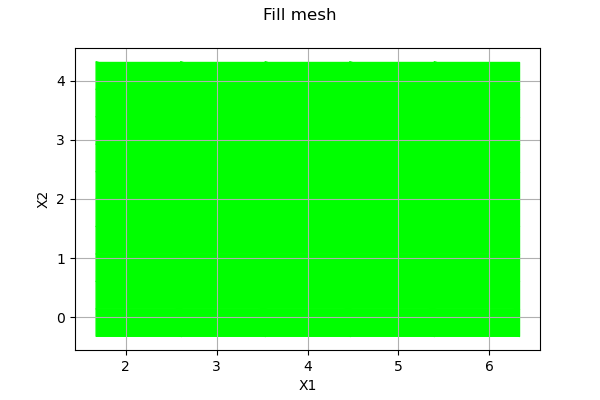

In [34]:
graph = ot.Graph("Fill mesh", "X1", "X2", True)
graph.add(boundsPoly)
graph.setLegends([""])
graph